In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
%matplotlib inline
dataset = pd.read_csv('24-hours dataset(old).csv', parse_dates=True)
dataset.head(100)



,Unnamed: 0,timestamp,day_of_week,hour_of_day,is_weekend,temperature,is_holiday,solar_generation,load,compensation_method
0,0,2023-01-01 00:00:00,6,0,1,17.483571,0,7.819507,18493,Normal Operation
1,1,2023-01-01 01:00:00,6,1,1,14.308678,0,0.886376,17090,Normal Operation
2,2,2023-01-01 02:00:00,6,2,1,18.238443,0,0.798470,16052,Normal Operation
3,3,2023-01-01 03:00:00,6,3,1,22.615149,0,3.067700,15356,Normal Operation
4,4,2023-01-01 04:00:00,6,4,1,13.829233,0,0.359479,14936,Normal Operation
...,...,...,...,...,...,...,...,...,...,...
95,95,2023-01-04 23:00:00,2,23,0,7.682425,0,6.897558,19517,Normal Operation
96,96,2023-01-05 00:00:00,3,0,0,16.480601,0,2.310348,18130,Normal Operation
97,97,2023-01-05 01:00:00,3,1,0,16.305276,0,9.695753,16923,Normal Operation
98,98,2023-01-05 02:00:00,3,2,0,15.025567,0,6.601761,16095,Normal Operation


In [3]:
dataset['timestamp']=pd.to_datetime(dataset['timestamp'])

In [4]:
x_data=dataset.values[:,(2,3,4,5,6,7)]
print(x_data)
x_target=dataset.values[:,9]
print(x_target)
print("x_data : ", x_data.shape)
print("x_target : " ,x_target.shape)
#x_train,x_test,y_train,y_test=train_test_split()

[[6 0 1 17.483570765056164 0 7.819507374259289]
 [6 1 1 14.308678494144075 0 0.8863756986523486]
 [6 2 1 18.23844269050346 0 0.798469675723642]
 ...
 [5 22 1 7.153052023126581 0 9.686245673010587]
 [5 23 1 11.815588055305213 0 0.4987254081937464]
 [6 0 1 16.035697183892843 0 0.6293595440244149]]
['Normal Operation' 'Normal Operation' 'Normal Operation' ...
 'Peak Load Shifting' 'Normal Operation' 'Normal Operation']
x_data :  (8737, 6)
x_target :  (8737,)


In [5]:
x_train,x_test,y_train,y_test=train_test_split(x_data,x_target,test_size=0.3,random_state=42)

print(x_train.shape)

print(y_train.shape)

print(x_test)

y_test

(6115, 6)
(6115,)
[[4 14 0 14.249722064837366 0 141.19595334256198]
 [2 1 0 30.385393056907468 0 0.7951593403083301]
 [6 6 1 31.739580390604416 0 130.2453683981196]
 ...
 [6 2 1 33.47583008809128 0 5.164738681007048]
 [1 6 0 36.7305171193124 0 209.9429302534912]
 [0 0 0 21.321330315261864 0 3.589829380247856]]


array(['Normal Operation', 'Normal Operation', 'Normal Operation', ...,
       'Normal Operation', 'Increased Renewable Energy Integration',
       'Normal Operation'], dtype=object)

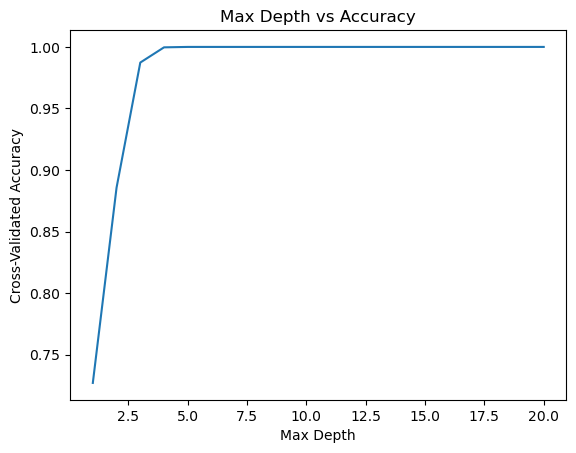

In [6]:
from sklearn.model_selection import cross_val_score


depths = range(1, 21)  # Test depths from 1 to 20
scores = []

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth)
    cv_scores = cross_val_score(model, x_data, x_target, cv=5)  # 5-fold CV
    scores.append(np.mean(cv_scores))

# Plotting results to find optimal depth

plt.plot(depths, scores)
plt.xlabel('Max Depth')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Max Depth vs Accuracy')
plt.show()

In [7]:
Decision_tree =DecisionTreeClassifier(criterion='entropy',random_state=42,max_depth=3,min_samples_leaf=5)


In [8]:
Decision_tree.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=42)

['Normal Operation' 'Normal Operation' 'Normal Operation' ...
 'Normal Operation' 'Increased Renewable Energy Integration'
 'Normal Operation']
Accuracy ::  98.77955758962625
Index(['day_of_week', 'hour_of_day', 'is_weekend', 'temperature', 'is_holiday',
       'solar_generation'],
      dtype='object')


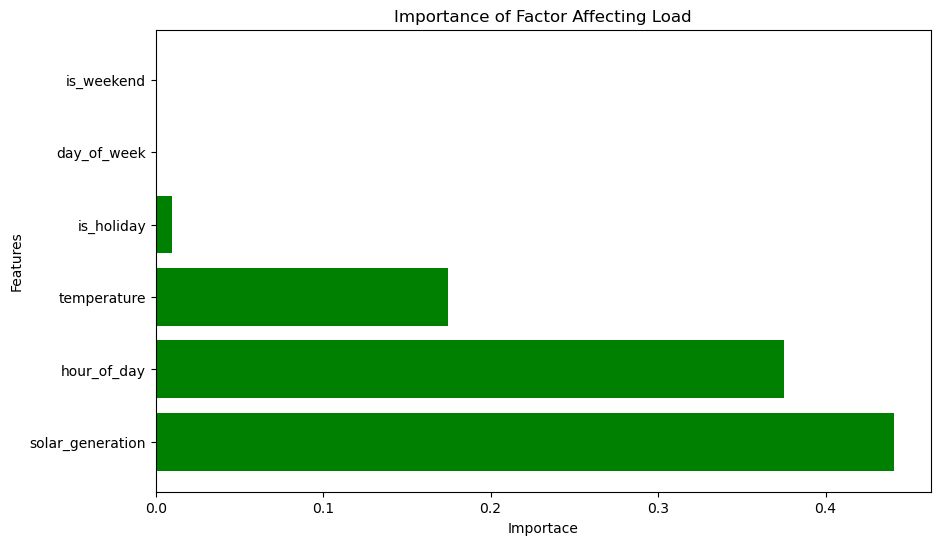

In [9]:
#predict the Decision Tree
y_predict_en=Decision_tree.predict(x_test)
print(y_predict_en)
#accuarcy
from sklearn.metrics import accuracy_score
print("Accuracy :: ", accuracy_score(y_test,y_predict_en)*100)
#plotting bar graph
importance_columns=Decision_tree.feature_importances_
#conversion of x_data to dataFrame
x_data_df=pd.DataFrame(dataset[['day_of_week','hour_of_day','is_weekend','temperature','is_holiday','solar_generation']])
#creating the DataFrame
x_data_df
importance_data = pd.DataFrame({
    'Features' :x_data_df.columns,
    'Importance' : importance_columns
}).sort_values(by='Importance',ascending=False)
print(x_data_df.columns)
#plotting
plt.figure(figsize=(10,6))
bars =plt.barh(importance_data['Features'],importance_data['Importance'],color='green')

# Adding labels to each bar
#for bar,column_name in zip(bars,x_data_df.columns):
 #   plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,column_name,
  #          va='center', ha='left', color='black')
plt.title('Importance of Factor Affecting Load')
plt.xlabel('Importace')
plt.ylabel('Features')
plt.show()

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
print(classification_report(y_test, y_predict_en))

                                        precision    recall  f1-score   support

                Increased Power Supply       1.00      0.92      0.96       183
Increased Renewable Energy Integration       1.00      1.00      1.00       559
                    Lower Power Supply       1.00      0.18      0.31        22
                      Normal Operation       0.98      1.00      0.99      1373
                    Peak Load Shifting       0.98      1.00      0.99       485

                              accuracy                           0.99      2622
                             macro avg       0.99      0.82      0.85      2622
                          weighted avg       0.99      0.99      0.99      2622



In [13]:
print(confusion_matrix(y_test, y_predict_en))

[[ 169    0    0   14    0]
 [   0  559    0    0    0]
 [   0    0    4   10    8]
 [   0    0    0 1373    0]
 [   0    0    0    0  485]]
